# Data Wrangling Project

# Gather

- Now we are going to gather the data from diffrent sources such as given file ,downloaded programmatically using request libarary and file constructed via API. 

#### given file

In [3]:
import pandas as pd

In [4]:

twitter_archive_enhanced=pd.read_csv('twitter-archive-enhanced-2.csv')

#### downloaded programmatically using request libarary

In [5]:
import requests
import os

In [6]:
url='https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
response

<Response [200]>

In [7]:
response.content

b"tweet_id\tjpg_url\timg_num\tp1\tp1_conf\tp1_dog\tp2\tp2_conf\tp2_dog\tp3\tp3_conf\tp3_dog\n666020888022790149\thttps://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg\t1\tWelsh_springer_spaniel\t0.465074\tTrue\tcollie\t0.156665\tTrue\tShetland_sheepdog\t0.0614285\tTrue\n666029285002620928\thttps://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg\t1\tredbone\t0.506826\tTrue\tminiature_pinscher\t0.07419169999999999\tTrue\tRhodesian_ridgeback\t0.07201\tTrue\n666033412701032449\thttps://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg\t1\tGerman_shepherd\t0.596461\tTrue\tmalinois\t0.13858399999999998\tTrue\tbloodhound\t0.11619700000000001\tTrue\n666044226329800704\thttps://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg\t1\tRhodesian_ridgeback\t0.408143\tTrue\tredbone\t0.360687\tTrue\tminiature_pinscher\t0.222752\tTrue\n666049248165822465\thttps://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg\t1\tminiature_pinscher\t0.560311\tTrue\tRottweiler\t0.243682\tTrue\tDoberman\t0.154629\tTrue\n666050758794694657\thttps://pbs.twimg.com/

- i found this method in stackoverflow to how convert data from requests object to dataframe with pandas
- https://stackoverflow.com/questions/39213597/convert-text-data-from-requests-object-to-dataframe-with-pandas



In [9]:
import io

response = requests.get(url).content

image_predictions= pd.read_csv(io.StringIO(response.decode('utf-8')),sep='\t')


#### file constructed via API

In [10]:
import tweepy
import json
consumer_key = ''
consumer_secret = ''
access_token = ''
access_secret = ''

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, parser=tweepy.parsers.JSONParser(), 
                 wait_on_rate_limit=True, wait_on_rate_limit_notify=True)
#'@dog_rates'

In [11]:
twitter = []
errors = []
tweet_id_list = twitter_archive_enhanced.tweet_id.tolist()
status_list = range(1, len(tweet_id_list), 100)

for index, id in enumerate(tweet_id_list):
    try:
        page = api.get_status(id)
        favorites = page['favorite_count']
        retweets = page['retweet_count']
        twitter.append({'tweet_id': int(id),
                        'favorites': int(favorites),
                        'retweets': int(retweets)})
        if index in status_list:
            print('Completed ~', index, ' Length of twitter_list is', 
                  len(twitter), ' Length of errors list is', 
                  len(errors))
        else:
            pass
    except Exception as e:
        errors.append((id, e))

tweet_count = pd.DataFrame.from_dict(twitter)

tweet_count = tweet_count[['tweet_id', 'favorites', 'retweets']]       

tweet_count.to_csv('tweet_count.csv', encoding='utf-8', index=False)


Completed ~ 1  Length of twitter_list is 2  Length of errors list is 0
Completed ~ 201  Length of twitter_list is 194  Length of errors list is 8
Completed ~ 301  Length of twitter_list is 290  Length of errors list is 12
Completed ~ 401  Length of twitter_list is 389  Length of errors list is 13
Completed ~ 501  Length of twitter_list is 489  Length of errors list is 13
Completed ~ 601  Length of twitter_list is 587  Length of errors list is 15
Completed ~ 701  Length of twitter_list is 687  Length of errors list is 15
Completed ~ 801  Length of twitter_list is 786  Length of errors list is 16


Rate limit reached. Sleeping for: 414


Completed ~ 901  Length of twitter_list is 885  Length of errors list is 17
Completed ~ 1001  Length of twitter_list is 984  Length of errors list is 18
Completed ~ 1101  Length of twitter_list is 1084  Length of errors list is 18
Completed ~ 1201  Length of twitter_list is 1184  Length of errors list is 18
Completed ~ 1301  Length of twitter_list is 1284  Length of errors list is 18
Completed ~ 1401  Length of twitter_list is 1384  Length of errors list is 18
Completed ~ 1501  Length of twitter_list is 1484  Length of errors list is 18
Completed ~ 1601  Length of twitter_list is 1584  Length of errors list is 18
Completed ~ 1701  Length of twitter_list is 1684  Length of errors list is 18


Rate limit reached. Sleeping for: 410


Completed ~ 1801  Length of twitter_list is 1783  Length of errors list is 19
Completed ~ 1901  Length of twitter_list is 1883  Length of errors list is 19
Completed ~ 2001  Length of twitter_list is 1983  Length of errors list is 19
Completed ~ 2101  Length of twitter_list is 2083  Length of errors list is 19
Completed ~ 2201  Length of twitter_list is 2183  Length of errors list is 19
Completed ~ 2301  Length of twitter_list is 2283  Length of errors list is 19


In [13]:
tweet_count = pd.read_csv('tweet_count.csv', encoding='utf-8')
tweet_count.head()

,tweet_id,favorites,retweets
0,892420643555336193,37527,8189
1,892177421306343426,32256,6057
2,891815181378084864,24300,4005
3,891689557279858688,40869,8337
4,891327558926688256,39064,9033


In [14]:
tweet_count.tail()

,tweet_id,favorites,retweets
2332,666049248165822465,104,41
2333,666044226329800704,288,135
2334,666033412701032449,120,43
2335,666029285002620928,124,46
2336,666020888022790149,2508,493


# Assess

- I'm going to assess eash dataframe and check each qualty and tidnis issue

In [15]:
#Visual assessment
twitter_archive_enhanced

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [16]:
twitter_archive_enhanced.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [17]:
twitter_archive_enhanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [18]:
twitter_archive_enhanced[twitter_archive_enhanced['in_reply_to_status_id'].isnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [19]:
twitter_archive_enhanced['floofer'].value_counts()

None       2346
floofer      10
Name: floofer, dtype: int64

In [20]:
twitter_archive_enhanced.query("floofer == 'floofer'")

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
46,883360690899218434,NaN,NaN,2017-07-07 16:22:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Grizzwald. He may be the floofiest floofe...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/883360690...,13,10,Grizzwald,None,floofer,None,None
200,854010172552949760,NaN,NaN,2017-04-17 16:34:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...","At first I thought this was a shy doggo, but i...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/854010172...,11,10,None,doggo,floofer,None,None
582,800388270626521089,NaN,NaN,2016-11-20 17:20:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Doc. He takes time out of every day to...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/800388270...,12,10,Doc,None,floofer,None,None
774,776218204058357768,NaN,NaN,2016-09-15 00:36:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Atlas rolled around in some chalk and now he's...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/776218204...,13,10,None,None,floofer,None,None
984,749317047558017024,NaN,NaN,2016-07-02 19:01:20 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Blu. He's a wild bush Floofer. I wish ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/749317047...,12,10,Blu,None,floofer,None,None
1022,746542875601690625,NaN,NaN,2016-06-25 03:17:46 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",Here's a golden floofer helping with the groce...,NaN,NaN,NaN,https://vine.co/v/5uZYwqmuDeT,11,10,None,None,floofer,None,None
1091,737445876994609152,NaN,NaN,2016-05-31 00:49:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Just wanted to share this super rare Rainbow F...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/737445876...,13,10,None,None,floofer,None,None
1110,733822306246479872,NaN,NaN,2016-05-21 00:50:46 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Moose. He's a Polynesian Floofer. Dapp...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/733822306...,10,10,Moose,None,floofer,None,None
1534,689993469801164801,NaN,NaN,2016-01-21 02:10:37 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",Here we are witnessing a rare High Stepping Al...,NaN,NaN,NaN,https://vine.co/v/ienexVMZgi5,12,10,None,None,floofer,None,None
1614,685307451701334016,NaN,NaN,2016-01-08 03:50:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Petrick. He's an Altostratus Floo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/685307451...,11,10,Petrick,None,floofer,None,None


In [21]:
twitter_archive_enhanced['doggo'].value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [22]:
twitter_archive_enhanced['pupper'].value_counts()


None      2099
pupper     257
Name: pupper, dtype: int64

In [23]:

twitter_archive_enhanced['puppo'].value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

In [24]:
twitter_archive_enhanced.query("doggo == 'doggo'")

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None
43,884162670584377345,NaN,NaN,2017-07-09 21:29:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Yogi. He doesn't have any important dog m...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/884162670...,12,10,Yogi,doggo,None,None,None
99,872967104147763200,NaN,NaN,2017-06-09 00:02:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a very large dog. He has a date later. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/872967104...,12,10,None,doggo,None,None,None
108,871515927908634625,NaN,NaN,2017-06-04 23:56:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Napolean. He's a Raggedy East Nicaragu...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/871515927...,12,10,Napolean,doggo,None,None,None
110,871102520638267392,NaN,NaN,2017-06-03 20:33:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Never doubt a doggo 14/10 https://t.co/AbBLh2FZCH,NaN,NaN,NaN,https://twitter.com/animalcog/status/871075758...,14,10,None,doggo,None,None,None
121,869596645499047938,NaN,NaN,2017-05-30 16:49:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Scout. He just graduated. Officially a...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/869596645...,12,10,Scout,doggo,None,None,None
172,858843525470990336,NaN,NaN,2017-05-01 00:40:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I have stumbled puppon a doggo painting party....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/858843525...,13,10,None,doggo,None,None,None
191,855851453814013952,NaN,NaN,2017-04-22 18:31:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo participating in the #ScienceMa...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/855851453...,13,10,None,doggo,None,None,puppo
200,854010172552949760,NaN,NaN,2017-04-17 16:34:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...","At first I thought this was a shy doggo, but i...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/854010172...,11,10,None,doggo,floofer,None,None
211,851953902622658560,NaN,NaN,2017-04-12 00:23:33 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Astrid. She's a guide d...,8.293743e+17,4.196984e+09,2017-02-08 17:00:26 +0000,https://twitter.com/dog_rates/status/829374341...,13,10,Astrid,doggo,None,None,None


In [25]:
twitter_archive_enhanced['in_reply_to_status_id'].sample()

254   NaN
Name: in_reply_to_status_id, dtype: float64

In [26]:
twitter_archive_enhanced['text'].sample()

1509    Say hello to Leo. He's a Fallopian Puffalope. ...
Name: text, dtype: object

In [27]:
twitter_archive_enhanced.shape

(2356, 17)

In [28]:
twitter_archive_enhanced.duplicated()

0       False
1       False
2       False
3       False
4       False
5       False
6       False
7       False
8       False
9       False
10      False
11      False
12      False
13      False
14      False
15      False
16      False
17      False
18      False
19      False
20      False
21      False
22      False
23      False
24      False
25      False
26      False
27      False
28      False
29      False
        ...  
2326    False
2327    False
2328    False
2329    False
2330    False
2331    False
2332    False
2333    False
2334    False
2335    False
2336    False
2337    False
2338    False
2339    False
2340    False
2341    False
2342    False
2343    False
2344    False
2345    False
2346    False
2347    False
2348    False
2349    False
2350    False
2351    False
2352    False
2353    False
2354    False
2355    False
Length: 2356, dtype: bool

In [29]:
twitter_archive_enhanced.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [30]:
twitter_archive_enhanced.in_reply_to_status_id.value_counts()

6.671522e+17    2
8.562860e+17    1
8.131273e+17    1
6.754971e+17    1
6.827884e+17    1
8.265984e+17    1
6.780211e+17    1
6.689207e+17    1
6.658147e+17    1
6.737159e+17    1
7.590995e+17    1
8.862664e+17    1
7.384119e+17    1
7.727430e+17    1
7.468859e+17    1
8.634256e+17    1
6.693544e+17    1
6.914169e+17    1
6.920419e+17    1
6.753494e+17    1
7.291135e+17    1
8.406983e+17    1
6.747400e+17    1
7.501805e+17    1
6.744689e+17    1
7.638652e+17    1
6.747934e+17    1
8.503288e+17    1
6.747522e+17    1
8.816070e+17    1
               ..
8.380855e+17    1
8.211526e+17    1
8.558616e+17    1
8.558585e+17    1
7.032559e+17    1
6.678065e+17    1
8.018543e+17    1
7.667118e+17    1
6.855479e+17    1
6.717299e+17    1
6.715610e+17    1
6.758457e+17    1
6.924173e+17    1
7.476487e+17    1
8.381455e+17    1
6.903413e+17    1
8.476062e+17    1
8.352460e+17    1
6.813394e+17    1
8.795538e+17    1
6.860340e+17    1
8.571567e+17    1
6.765883e+17    1
7.044857e+17    1
8.707262e+

In [31]:
#Visual assessment
image_predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [32]:
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [33]:
image_predictions.tail()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


In [34]:
image_predictions.shape

(2075, 12)

In [35]:
image_predictions.duplicated()

0       False
1       False
2       False
3       False
4       False
5       False
6       False
7       False
8       False
9       False
10      False
11      False
12      False
13      False
14      False
15      False
16      False
17      False
18      False
19      False
20      False
21      False
22      False
23      False
24      False
25      False
26      False
27      False
28      False
29      False
        ...  
2045    False
2046    False
2047    False
2048    False
2049    False
2050    False
2051    False
2052    False
2053    False
2054    False
2055    False
2056    False
2057    False
2058    False
2059    False
2060    False
2061    False
2062    False
2063    False
2064    False
2065    False
2066    False
2067    False
2068    False
2069    False
2070    False
2071    False
2072    False
2073    False
2074    False
Length: 2075, dtype: bool

In [36]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [37]:
image_predictions.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2011,879008229531029506,https://pbs.twimg.com/media/DDLdUrqXYAMOVzY.jpg,1,vizsla,0.960513,True,miniature_pinscher,0.009431,True,American_Staffordshire_terrier,0.008711,True
914,700890391244103680,https://pbs.twimg.com/media/CboQFolWIAE04qE.jpg,1,white_wolf,0.166563,False,schipperke,0.122356,True,West_Highland_white_terrier,0.119247,True
1183,738537504001953792,https://pbs.twimg.com/media/Cj_P7rSUgAAYQbz.jpg,1,chow,0.808737,True,gibbon,0.028942,False,Pembroke,0.026498,True
94,667550882905632768,https://pbs.twimg.com/media/CUObvUJVEAAnYPF.jpg,1,web_site,0.998258,False,dishwasher,0.000201,False,oscilloscope,0.000142,False
1843,838561493054533637,https://pbs.twimg.com/media/C6MrOsEXQAENOds.jpg,1,kelpie,0.216562,True,doormat,0.139994,False,dalmatian,0.132820,True


In [93]:
#Visual assessment
tweet_count

,tweet_id,favorites,retweets
0,892420643555336193,37527,8189
1,892177421306343426,32256,6057
2,891815181378084864,24300,4005
3,891689557279858688,40869,8337
4,891327558926688256,39064,9033
5,891087950875897856,19642,3000
6,890971913173991426,11475,1984
7,890729181411237888,63307,18181
8,890609185150312448,27013,4120
9,890240255349198849,30938,7108


In [94]:
tweet_count.head(30)

,tweet_id,favorites,retweets
0,892420643555336193,37527,8189
1,892177421306343426,32256,6057
2,891815181378084864,24300,4005
3,891689557279858688,40869,8337
4,891327558926688256,39064,9033
5,891087950875897856,19642,3000
6,890971913173991426,11475,1984
7,890729181411237888,63307,18181
8,890609185150312448,27013,4120
9,890240255349198849,30938,7108


In [95]:
tweet_count.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2337 entries, 0 to 2336
Data columns (total 3 columns):
tweet_id     2337 non-null int64
favorites    2337 non-null int64
retweets     2337 non-null int64
dtypes: int64(3)
memory usage: 54.9 KB


In [96]:
tweet_count.describe()

,tweet_id,favorites,retweets
count,2.337000e+03,2337.000000,2337.000000
mean,7.420692e+17,7840.184852,2876.255884
std,6.824243e+16,12151.715753,4858.989345
min,6.660209e+17,0.000000,1.000000
25%,6.783345e+17,1362.000000,580.000000
50%,7.185406e+17,3421.000000,1344.000000
75%,7.986825e+17,9604.000000,3355.000000
max,8.924206e+17,162048.000000,82419.000000


In [97]:
tweet_count.duplicated()

0       False
1       False
2       False
3       False
4       False
5       False
6       False
7       False
8       False
9       False
10      False
11      False
12      False
13      False
14      False
15      False
16      False
17      False
18      False
19      False
20      False
21      False
22      False
23      False
24      False
25      False
26      False
27      False
28      False
29      False
        ...  
2307    False
2308    False
2309    False
2310    False
2311    False
2312    False
2313    False
2314    False
2315    False
2316    False
2317    False
2318    False
2319    False
2320    False
2321    False
2322    False
2323    False
2324    False
2325    False
2326    False
2327    False
2328    False
2329    False
2330    False
2331    False
2332    False
2333    False
2334    False
2335    False
2336    False
Length: 2337, dtype: bool


#### Quality
##### `twitter_archive_enhanced` table

 - Erroneous datatypes (tweet_id   and timestamp columns)
 - drop the irrelevant columns .
 - Erroneous rating_nominator and rating_denominator values.
 - change the values that showing as 'None' into ' NaN' 
 - Display full content of 'text' column.
 - make the source more readable 
##### `image_predictions` table
 - Column names are not informative.
 - capitlized the each first litter an the breed of dogs and removes the _ 
 - Erroneous datatypes (tweet_id)
##### `tweet_count` table
 - Erroneous datatypes (tweet_id)
 

#### Tidiness
- compine the stages of the dogs in one columns `twitter_archive_enhanced`
- compine all the 3 data set into one set 

# Clean

In [134]:
twitter_archive_enhanced_clean=twitter_archive_enhanced.copy()

In [135]:
image_predictions_clean=image_predictions.copy()

In [136]:
twitter_counts_clean=tweet_count.copy()

### Tidiness 

##### Define

- compine the stages that actully are in four columns: doggo, floofer, pupper and puppo to one columns in the `twitter_archive_enhanced` table


##### Code

In [137]:
#create new column for the dog stages

twitter_archive_enhanced_clean['Stages'] = twitter_archive_enhanced_clean['text'].str.extract('(puppo|pupper|floofer|doggo)',expand=True)

In [138]:
twitter_archive_enhanced_clean=twitter_archive_enhanced_clean.drop('puppo',axis=1)
twitter_archive_enhanced_clean=twitter_archive_enhanced_clean.drop('pupper',axis=1)
twitter_archive_enhanced_clean=twitter_archive_enhanced_clean.drop('floofer',axis=1)
twitter_archive_enhanced_clean=twitter_archive_enhanced_clean.drop('doggo',axis=1)

##### Test

- to test if the new columns has been added and dropped the old one

In [101]:
twitter_archive_enhanced_clean.sample(2)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,Stages
41,884441805382717440,2017-07-10 15:58:53,Twitter for iPhone,"I present to you, Pup in Hat. Pup in Hat is great for all occasions. Extremely versatile. Compact as h*ck. 14/10 (IG: itselizabethgales) https://t.co/vvBOcC2VdC",https://twitter.com/dog_rates/status/884441805382717440/photo/1,14,10,NaN,NaN
2112,670435821946826752,2015-11-28 02:55:30,Twitter for iPhone,Two unbelievably athletic dogs here. Great form. Perfect execution. 10/10 for both https://t.co/sQuKwSKtDE,https://twitter.com/dog_rates/status/670435821946826752/photo/1,10,10,NaN,NaN


### Quality 

##### Define
 - Drop the irrelevant columns.

##### Code

In [139]:
twitter_archive_enhanced_clean.drop([
    'in_reply_to_status_id',
    'in_reply_to_user_id',
    'retweeted_status_id',
    'retweeted_status_user_id',
    'retweeted_status_timestamp',
], axis=1,inplace=True)

##### Test

In [140]:
twitter_archive_enhanced_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 9 columns):
tweet_id              2356 non-null int64
timestamp             2356 non-null object
source                2356 non-null object
text                  2356 non-null object
expanded_urls         2297 non-null object
rating_numerator      2356 non-null int64
rating_denominator    2356 non-null int64
name                  2356 non-null object
Stages                399 non-null object
dtypes: int64(3), object(6)
memory usage: 165.7+ KB


#### Define
 - cnovert the  erroneous datatypes for the vairbles in the dataframe with the approprate ones

#### Code

In [104]:
twitter_archive_enhanced_clean.timestamp.sample()

495   2016-12-26 00:00:03
Name: timestamp, dtype: datetime64[ns]

In [105]:
twitter_archive_enhanced_clean['timestamp'] = pd.to_datetime(twitter_archive_enhanced_clean['timestamp'])

In [106]:
twitter_archive_enhanced_clean.tweet_id = twitter_archive_enhanced_clean.tweet_id.astype(str)

In [107]:
twitter_counts_clean.tweet_id = twitter_counts_clean.tweet_id.astype(str)

In [108]:
image_predictions_clean.tweet_id = image_predictions_clean.tweet_id.astype(str)

#### Test

In [109]:
twitter_archive_enhanced_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 9 columns):
tweet_id              2356 non-null object
timestamp             2356 non-null datetime64[ns]
source                2356 non-null object
text                  2356 non-null object
expanded_urls         2297 non-null object
rating_numerator      2356 non-null object
rating_denominator    2356 non-null int64
name                  1611 non-null object
Stages                399 non-null object
dtypes: datetime64[ns](1), int64(1), object(7)
memory usage: 165.7+ KB


In [110]:
image_predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null object
jpg_url     2075 non-null object
img_num     2075 non-null int64
breed-p1    2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
breed-p2    2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
breed-p3    2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


In [111]:
twitter_counts_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2337 entries, 0 to 2336
Data columns (total 3 columns):
tweet_id     2337 non-null object
favorites    2337 non-null int64
retweets     2337 non-null int64
dtypes: int64(2), object(1)
memory usage: 54.9+ KB


#### Define
- display full content of 'text' column.

#### Code

In [112]:
twitter_archive_enhanced_clean.text.sample()

1743    Crazy unseen footage from Jurassic Park. 10/10 for both dinosaur puppers https://t.co/L8wt2IpwxO
Name: text, dtype: object

In [113]:
# to display the full text i used this method from StachOverFlow
# https://stackoverflow.com/questions/25351968/how-to-display-full-non-truncated-dataframe-information-in-html-when-convertin

pd.set_option('display.max_colwidth', -1)

#### Test

In [114]:
twitter_archive_enhanced_clean.text.sample()

368    This is Fiona. She's an exotic dog. Seems rather impatient. Jaw extension on another level tho. Looks slippery. 10/10 would still pet https://t.co/vst2SEVJO3
Name: text, dtype: object

#### Define
- change the values that showing as 'None' into ' NaN' 

#### Code

In [115]:
import numpy as np
import matplotlib.pyplot as plt

In [116]:
twitter_archive_enhanced_clean['name'] = twitter_archive_enhanced_clean['name'].replace('None', np.NaN)

#### Test

In [117]:
twitter_archive_enhanced_clean.name.sample()

548    Sansa
Name: name, dtype: object

#### Define
- Correcting rhe erroneous rating_nominator values.

#### Code

In [118]:
twitter_archive_enhanced_clean.rating_numerator.sample(10)

212     10
2324    12
709     11
732     12
224     11
1009    10
1961    8 
266     13
360     12
1620    12
Name: rating_numerator, dtype: object

In [119]:
rate = twitter_archive_enhanced_clean.text.str.extract('((?:\d+\.)?\d+)\/(\d+)',expand=True)
rate

,0,1
0,13,10
1,13,10
2,12,10
3,13,10
4,12,10
5,13,10
6,13,10
7,13,10
8,13,10
9,14,10


In [120]:
twitter_archive_enhanced_clean['rating_numerator']=rate[0]

#### Test

In [121]:
twitter_archive_enhanced_clean['rating_numerator'].sample(20)

228     11   
209     14   
1256    12   
100     13   
686     11   
730     5    
495     12   
1684    7    
1359    9    
763     11.27
720     11   
270     13   
413     13   
1792    9    
932     12   
410     11   
1538    11   
2015    9    
876     11   
1338    12   
Name: rating_numerator, dtype: object

#### Define 
- Change the contest in columns (p1,p2,p3) by removing the (_) and make each first litter capitlized in the image_predictions_clean table

#### Code

In [68]:
image_predictions_clean.head(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [69]:
image_predictions_clean['p1'] = image_predictions_clean['p1'].str.replace('_', ' ')
image_predictions_clean['p2'] = image_predictions_clean['p2'].str.replace('_', ' ')
image_predictions_clean['p3'] = image_predictions_clean['p3'].str.replace('_', ' ')

In [70]:
image_predictions_clean['p1'] = image_predictions_clean['p1'].str.title()
image_predictions_clean['p2'] = image_predictions_clean['p2'].str.title()
image_predictions_clean['p3'] = image_predictions_clean['p3'].str.title()

#### Test

In [71]:
image_predictions_clean.head(3)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh Springer Spaniel,0.465074,True,Collie,0.156665,True,Shetland Sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Redbone,0.506826,True,Miniature Pinscher,0.074192,True,Rhodesian Ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German Shepherd,0.596461,True,Malinois,0.138584,True,Bloodhound,0.116197,True


#### Define 
- change the column names in the image_predictions_clean table ti make it more informative.

#### Code 

In [72]:
image_predictions_clean.head(2)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh Springer Spaniel,0.465074,True,Collie,0.156665,True,Shetland Sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Redbone,0.506826,True,Miniature Pinscher,0.074192,True,Rhodesian Ridgeback,0.072010,True


In [73]:
image_predictions_clean.rename(columns={'p1':'breed-p1',
                          'p2':'breed-p2',
                          'p3':'breed-p3'}, 
                 inplace=True)

#### Test

In [74]:
image_predictions_clean.head(2)

,tweet_id,jpg_url,img_num,breed-p1,p1_conf,p1_dog,breed-p2,p2_conf,p2_dog,breed-p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh Springer Spaniel,0.465074,True,Collie,0.156665,True,Shetland Sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Redbone,0.506826,True,Miniature Pinscher,0.074192,True,Rhodesian Ridgeback,0.072010,True


#### Define
- make the source more readable 


#### Code

In [75]:
twitter_archive_enhanced_clean.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                        91  
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                     33  
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>    11  
Name: source, dtype: int64

In [76]:
twitter_archive_enhanced_clean.source.sample(3)

1682    <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
485     <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
2243    <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
Name: source, dtype: object

In [77]:
twitter_archive_enhanced_clean.source=twitter_archive_enhanced_clean.source.str.extract('(Twitter for iPhone|Vine - Make a Scene|Twitter Web Client|TweetDeck)')

#### Test

In [78]:
twitter_archive_enhanced_clean.source.sample(3)

339     Twitter for iPhone
978     TweetDeck         
1249    Twitter for iPhone
Name: source, dtype: object

### Tidness

#### Define

- combine all the 3 sets 

#### Code

In [122]:
df_combined = pd.merge(twitter_archive_enhanced_clean, twitter_counts_clean, on='tweet_id', how='inner')
df_combined = pd.merge(df_combined, image_predictions_clean,on='tweet_id', how='inner')

#### Test

In [123]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2065 entries, 0 to 2064
Data columns (total 22 columns):
tweet_id              2065 non-null object
timestamp             2065 non-null datetime64[ns]
source                2065 non-null object
text                  2065 non-null object
expanded_urls         2065 non-null object
rating_numerator      2065 non-null object
rating_denominator    2065 non-null int64
name                  1490 non-null object
Stages                338 non-null object
favorites             2065 non-null int64
retweets              2065 non-null int64
jpg_url               2065 non-null object
img_num               2065 non-null int64
breed-p1              2065 non-null object
p1_conf               2065 non-null float64
p1_dog                2065 non-null bool
breed-p2              2065 non-null object
p2_conf               2065 non-null float64
p2_dog                2065 non-null bool
breed-p3              2065 non-null object
p3_conf               2065 non-n

# STORING

In [124]:
df_combined.to_csv('twitter_archive_master.csv')

#  Analyzing


In [125]:
df=pd.read_csv('twitter_archive_master.csv')

In [126]:
df.source.value_counts()

Twitter for iPhone    2025
Twitter Web Client    30  
TweetDeck             10  
Name: source, dtype: int64

## Insight 1
### what is the most repeted source that all the tweets we have gathered come from ?

In [127]:
sorces=[]
sorces=df.source.value_counts()

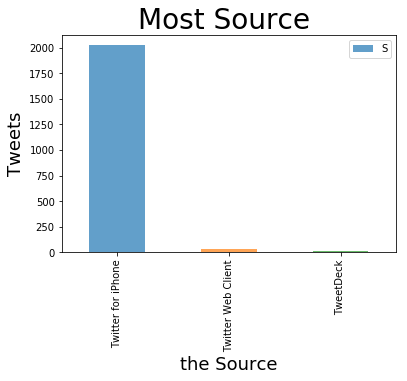

In [128]:
sorces.plot(kind='bar',alpha=0.7)
plt.title("Most Source ", fontsize =28)
plt.xlabel('the Source', fontsize =18)
plt.ylabel('Tweets', fontsize=18)
plt.legend('Source');

#### - We have find that the most reapeted source for the tweets are from Iphone.

## Insight 2
### What are the dogs names that have gathered the maximum number of favorites
#### So i'm going to take the first 10 samples to find the maximum number of favorites. first thing i'm goint ti assign the first 10 samples into new data set without manipulate the original dataset.

In [129]:
df1=df.head(10)
df1.head()

,Unnamed: 0,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,Stages,...,img_num,breed-p1,p1_conf,p1_dog,breed-p2,p2_conf,p2_dog,breed-p3,p3_conf,p3_dog
0,0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13.0,10,Phineas,NaN,...,1,Orange,0.097049,False,Bagel,0.085851,False,Banana,0.076110,False
1,1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13.0,10,Tilly,NaN,...,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,Papillon,0.068957,True
2,2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12.0,10,Archie,NaN,...,1,Chihuahua,0.716012,True,Malamute,0.078253,True,Kelpie,0.031379,True
3,3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13.0,10,Darla,NaN,...,1,Paper Towel,0.170278,False,Labrador Retriever,0.168086,True,Spatula,0.040836,False
4,4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12.0,10,Franklin,NaN,...,2,Basset,0.555712,True,English Springer,0.225770,True,German Short-Haired Pointer,0.175219,True


In [130]:
df1.groupby('name').max().favorites

name
Archie      24300
Cassie      30938
Darla       40869
Franklin    39064
Jax         11475
Phineas     37527
Tilly       32256
Zoey        27013
Name: favorites, dtype: int64

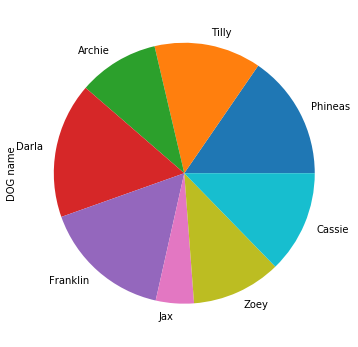

In [131]:
series = pd.Series(df1.groupby('name').max().favorites,df1['name'], name='DOG name')
series.plot.pie(figsize=(6, 6));

#### From this chart I've discoverd that the dog Darla gatherd the highest favorites among the others.

## Insight 3
### What is the most popular dog type ?

In [132]:
df.Stages.value_counts()

pupper     231
doggo      75 
puppo      29 
floofer    3  
Name: Stages, dtype: int64

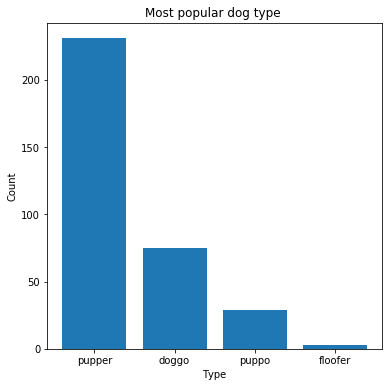

In [133]:
dog = ['pupper', 'doggo', 'puppo', 'floofer']
dogCount = [231, 75, 29, 3]

fig,ax = plt.subplots(figsize = (6,6))
ax.bar(dog, dogCount, width = 0.8)
ax.set_ylabel('Count')
ax.set_xlabel('Type')
plt.title("Most popular dog type ")
plt.show()

#### We have figure out that the most dog type are the PUPPER

# visualizing 

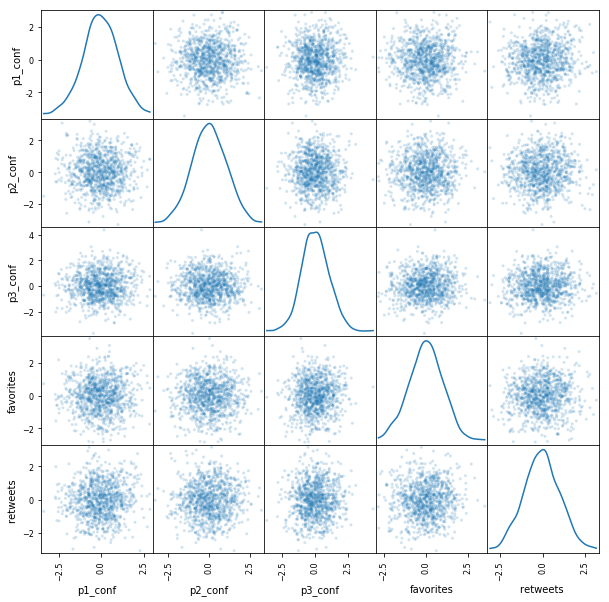

In [146]:
df1 = pd.DataFrame(np.random.randn(1000, 5), columns=['p1_conf','p2_conf','p3_conf','favorites','retweets '])

from pandas.plotting import scatter_matrix
scatter_matrix(df1, alpha=0.2, figsize=(10,10), diagonal='kde');